In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [12, 3.3], 
    'axes.labelsize': 12,
    'axes.titlesize':14, 
    'font.size': 12,
    'legend.fontsize': 10, 
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10,
    'axes.axisbelow': True
}
plt.rcParams.update(params)

In [3]:
def printarResultado(matrizProbabilidadeDeteccao, matrizConfusao, rangePotEspiao, rangeSNRs, qtdUsuarios, qtdAntenas, qtdSimbolos, descricao, acuracia, precisao, revocacao):
    
    # MONTANDO O TITULO DA FIGURA
    titulo  = descricao + "\n"
    titulo += "Usuários: " + str(qtdUsuarios) + " - Antenas: " + str(qtdAntenas) + " - Símbolos: " + str(qtdSimbolos) + "\n"
    titulo += "Acurácia: " + str(acuracia)[:7] + " - Precisão: " + str(precisao)[:7] + " - Revocação: " + str(revocacao)[:7] + "\n"
    
    # CRIANDO O PRIMEIRO GRAFICO
    fig, axs = plt.subplots(1, 2)
    for i in range(len(rangePotEspiao)):
        axs[0].plot(rangeSNRs, matrizProbabilidadeDeteccao[i], label="Potência do Espião: "+str(rangePotEspiao[i]))
    axs[0].set_xlabel("SNR")
    axs[0].set_ylabel("Probabilidade de Detecção")
    axs[0].grid(alpha=0.5)
    axs[0].legend()
    
    # CRIANDO A MATRIZ DE CONFUSAO
    axs[1].imshow(matrizConfusao, cmap="gray")
    for (j,i), total in np.ndenumerate(matrizConfusao):
        axs[1].text(i, j, int(total), ha="center", va="center", color="#e6005c", size=15)
    axs[1].set_xlabel("Predito")
    axs[1].set_ylabel("Real")
    axs[1].set_xticklabels([])
    axs[1].set_yticklabels([])
    
    # PRINTANDO
    plt.suptitle(titulo, y=1.15)
    plt.show()

## Printando a cada qtd de usuários




QTD DE USUÁRIOS: 1


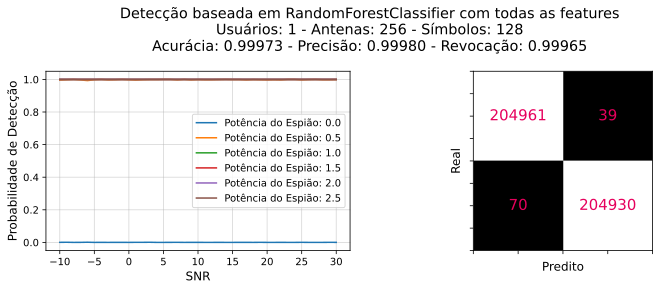

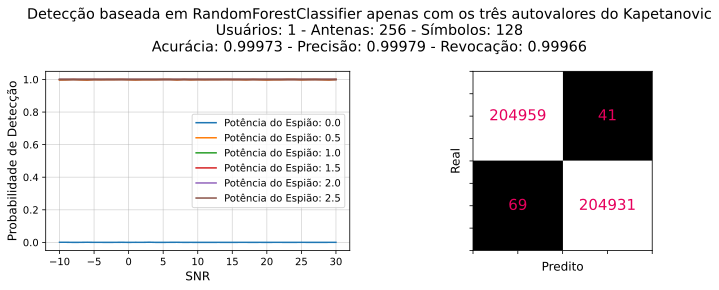

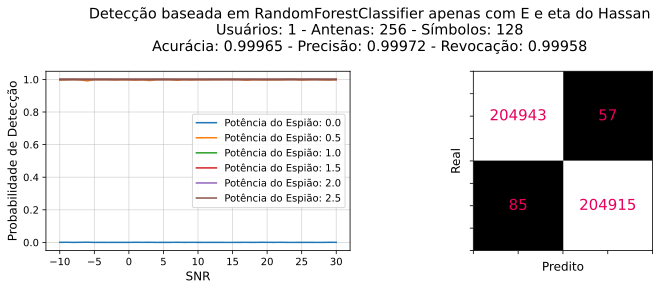

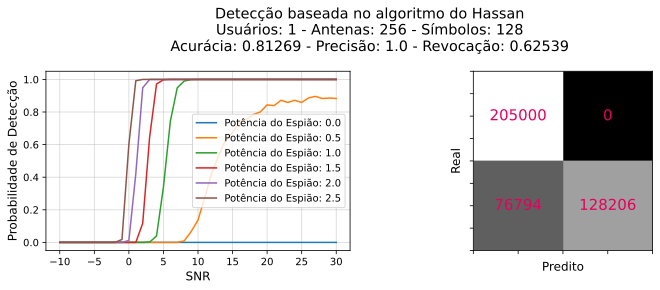

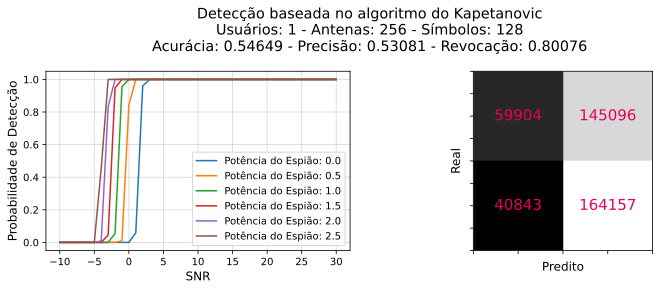




QTD DE USUÁRIOS: 2


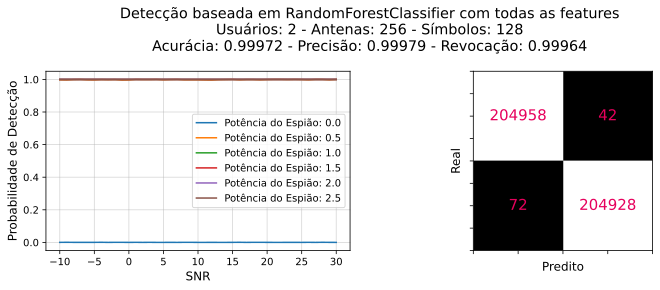

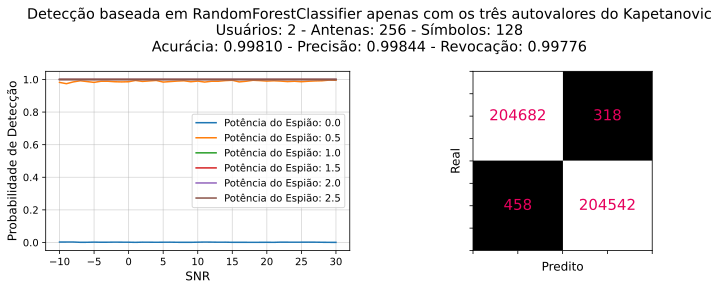

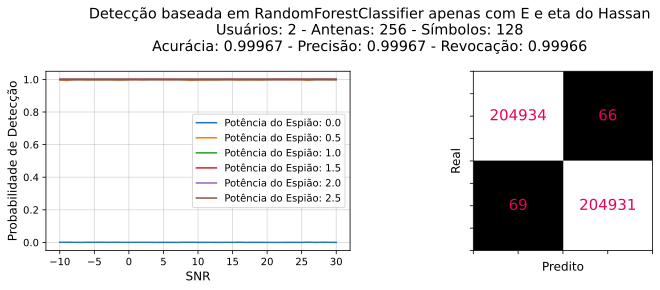

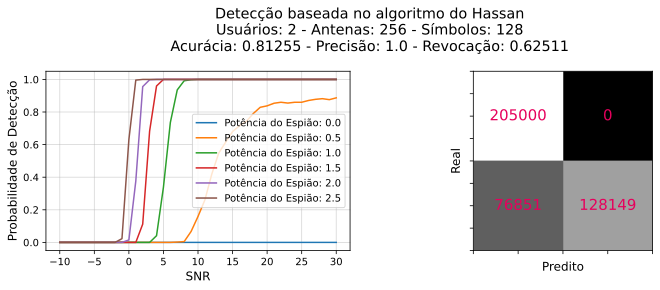

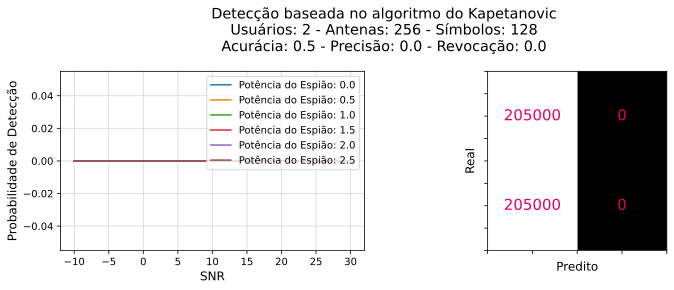




QTD DE USUÁRIOS: 4


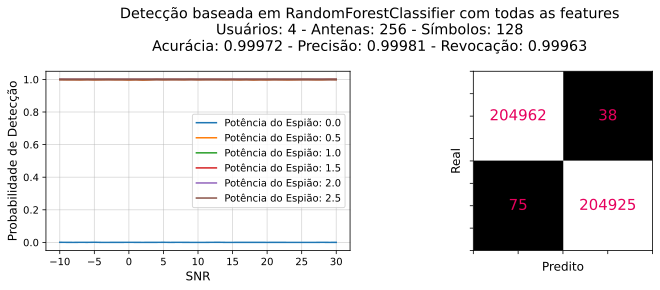

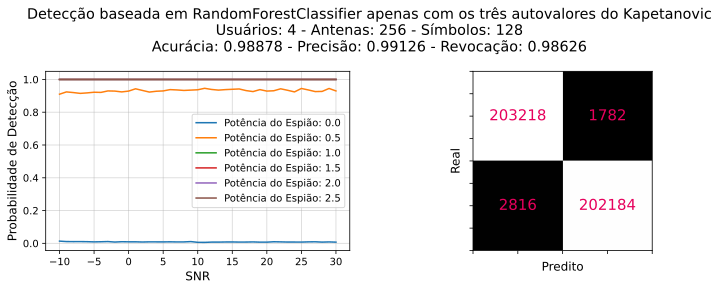

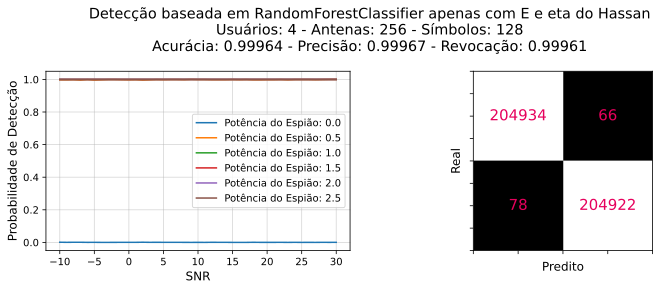

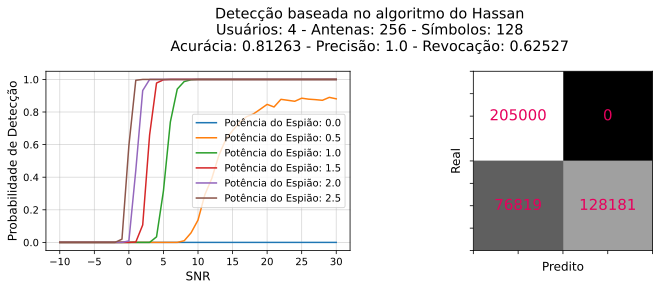

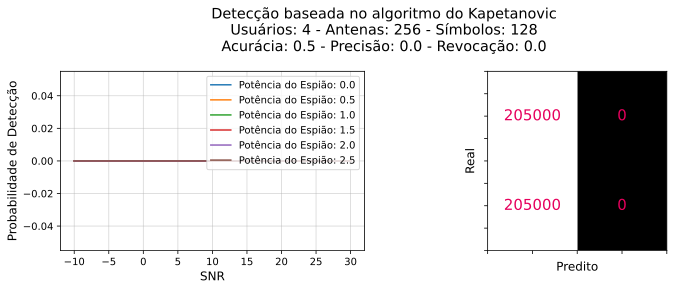




QTD DE USUÁRIOS: 8


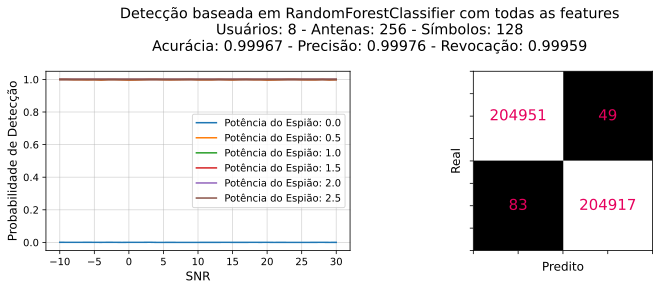

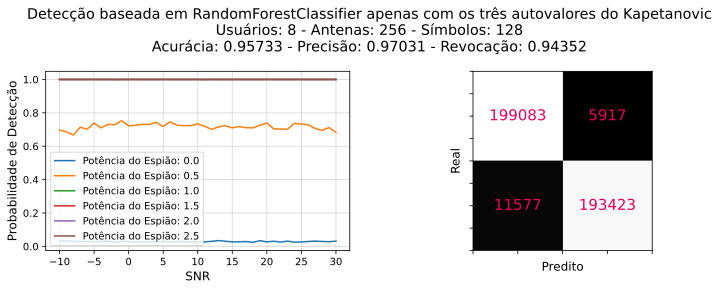

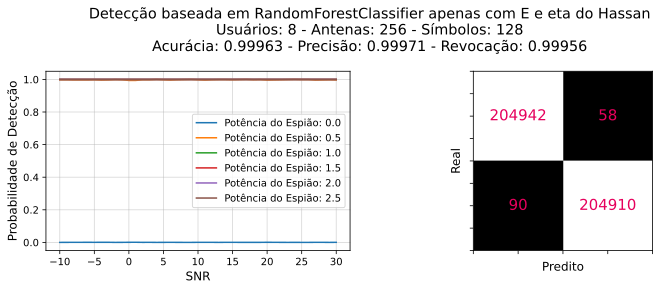

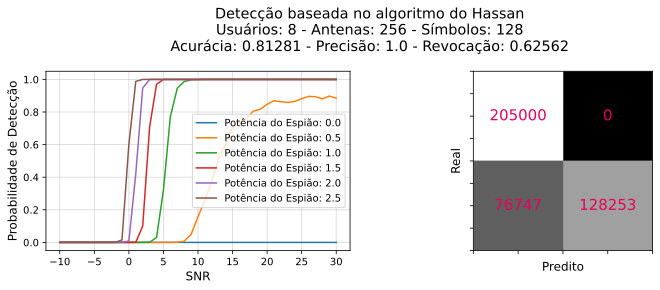

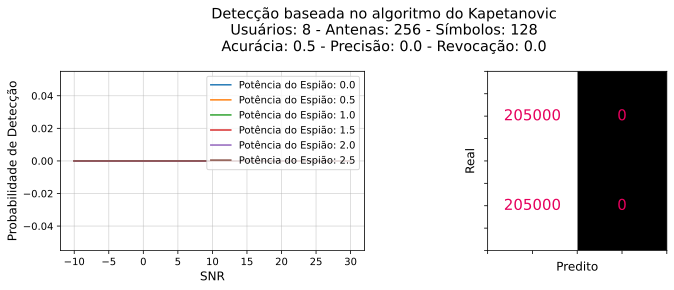




QTD DE USUÁRIOS: 16


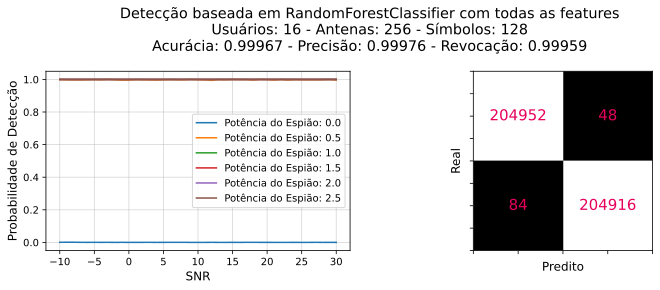

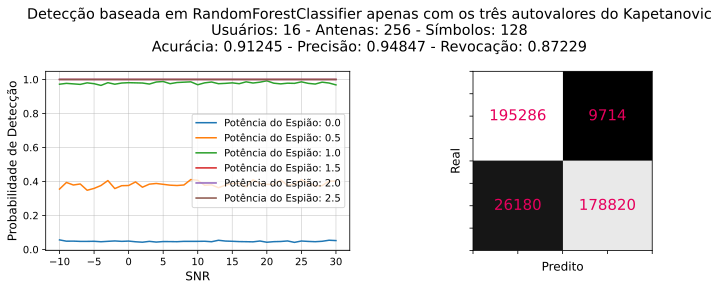

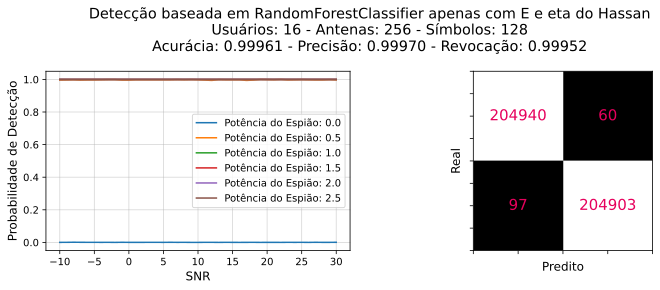

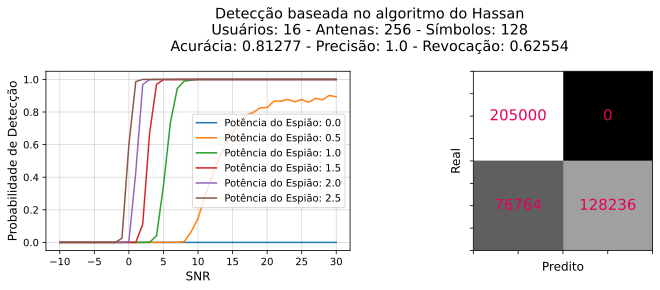

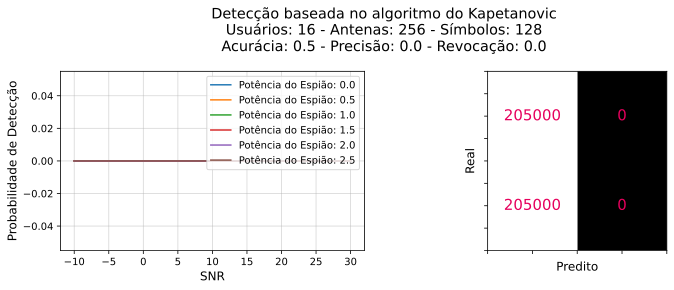




QTD DE USUÁRIOS: 32


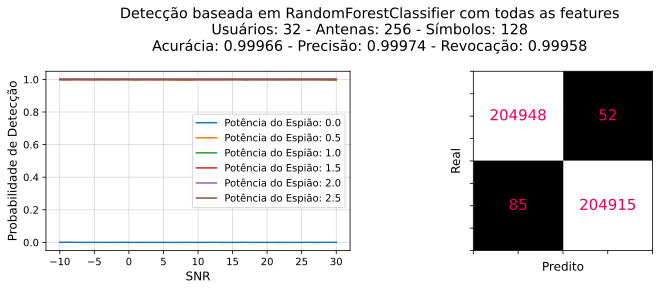

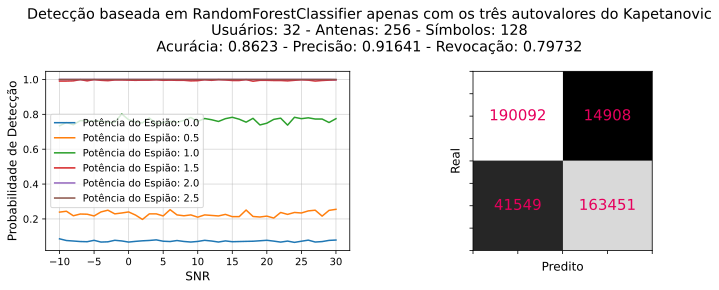

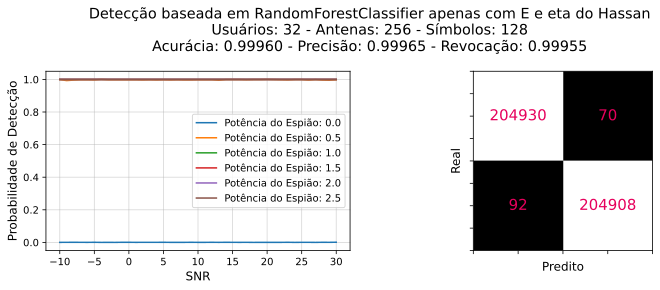

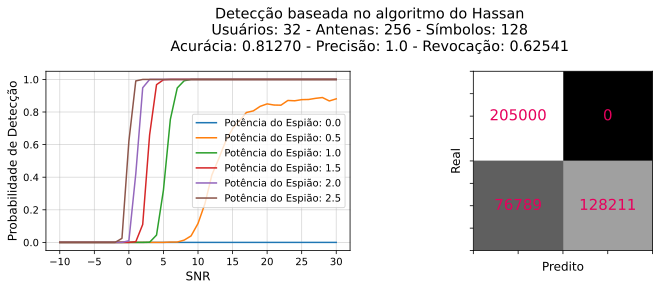

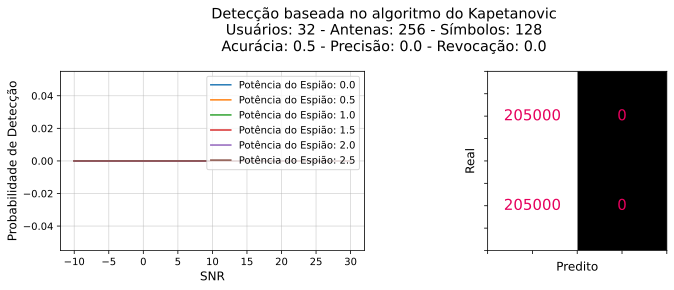




QTD DE USUÁRIOS: 64


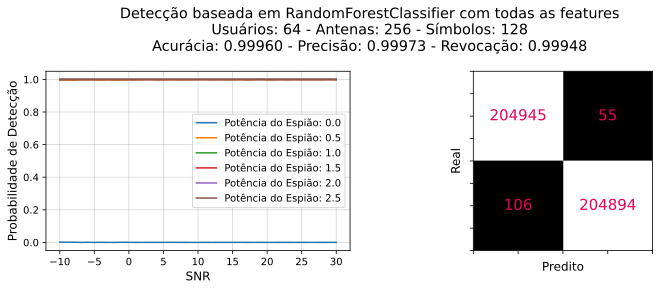

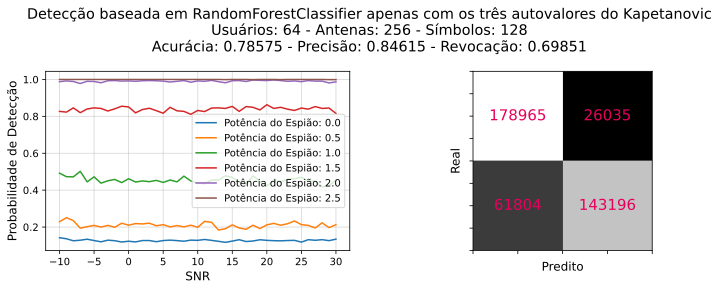

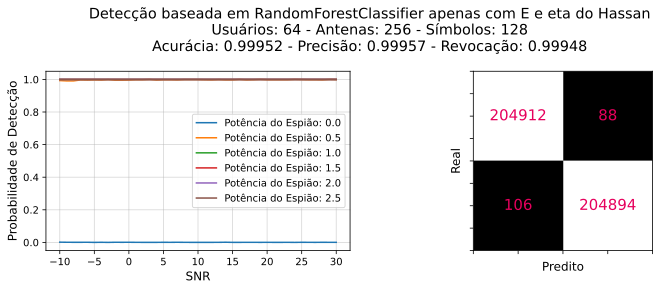

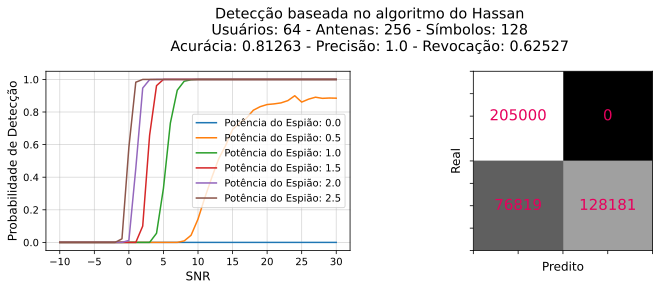

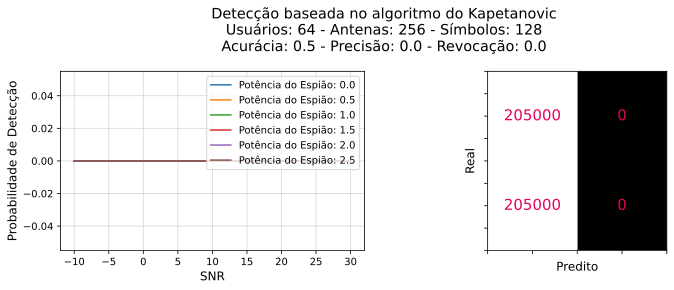




QTD DE USUÁRIOS: 128


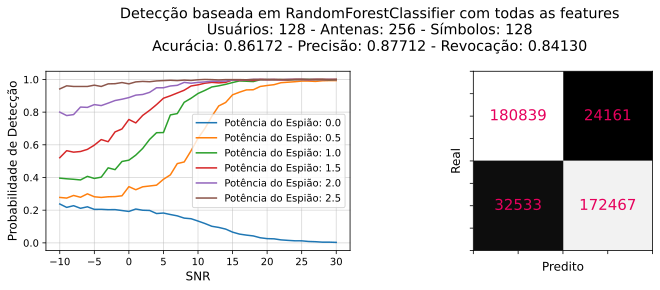

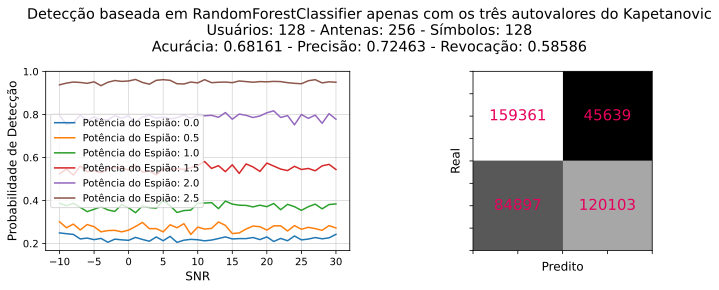

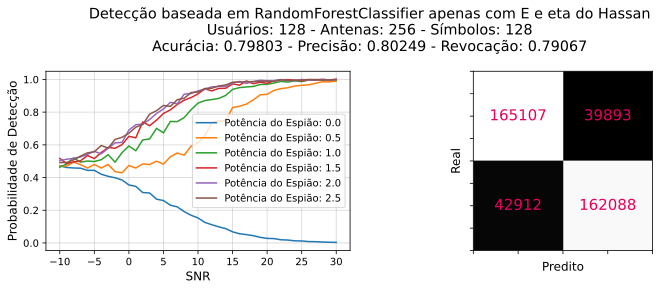

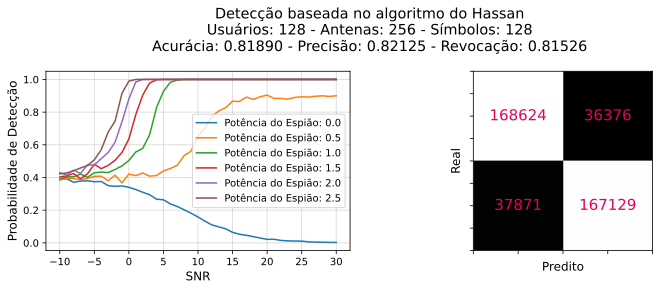

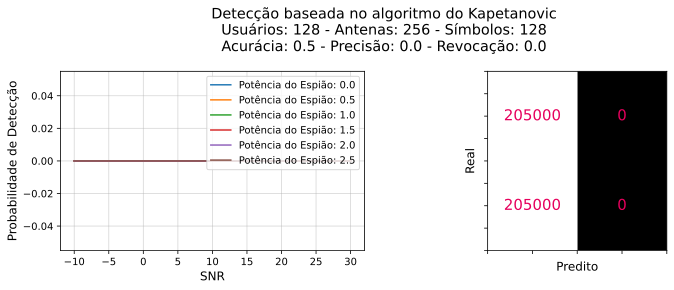




QTD DE USUÁRIOS: 256


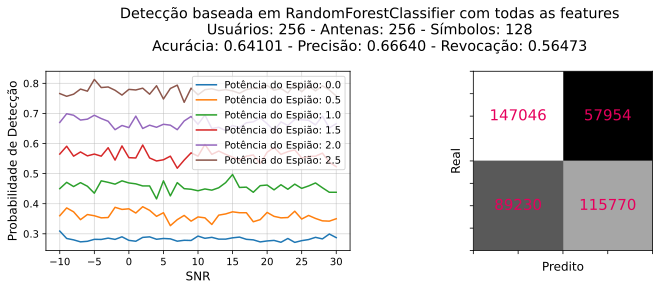

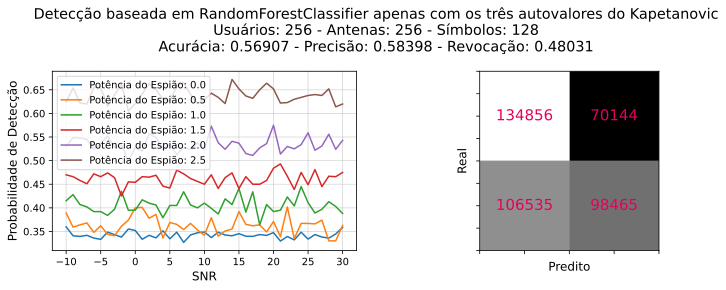

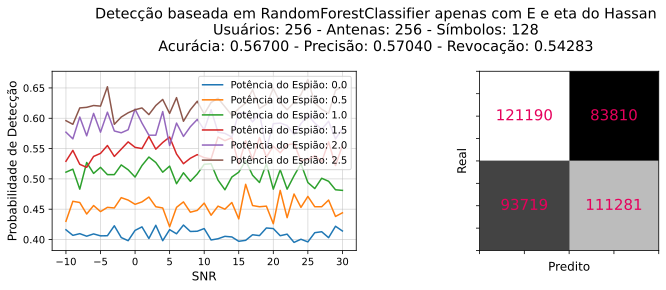

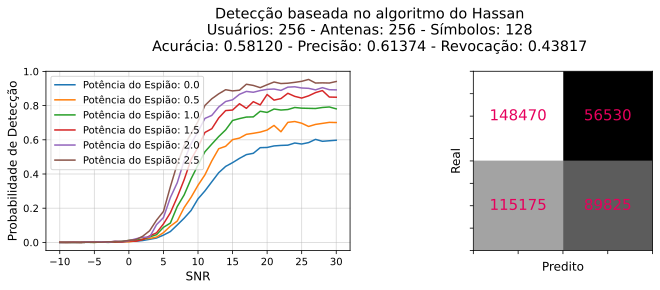

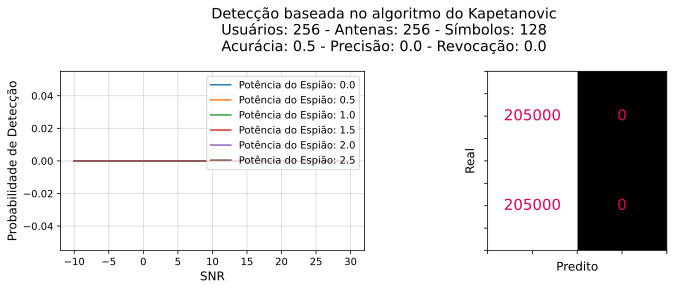

In [5]:
data = json.load(open("../../Resultados/probabilidadeDeteccao_1600542526.9041057.json"))

for qtdUsuariosDesejada in [1,2,4,8,16,32,64,128,256]:    
    print("\n\n\nQTD DE USUÁRIOS:", qtdUsuariosDesejada)
    for i in data:         
        if int(i["qtdUsuarios"]) == qtdUsuariosDesejada:
        
            matrizProbabilidadeDeteccao = eval(i["matrizProbabilidadeDeteccao"].replace(',,', ',')) 
            matrizConfusao              = eval(i["matrizConfusao"]) 
            rangePotEspiao              = eval(i["rangePotEspiao"]) 
            rangeSNRs                   = eval(i["rangeSNRs"]) 
            qtdUsuarios                 = int(i["qtdUsuarios"]) 
            qtdAntenas                  = int(i["qtdAntenas"]) 
            qtdSimbolos                 = int(i["qtdSimbolos"]) 
            descricao                   = i["descricao"]
            acuracia                    = float(i["acuracia"]) 
            precisao                    = float(i["precisao"]) 
            revocacao                   = float(i["revocacao"])

            printarResultado(matrizProbabilidadeDeteccao, matrizConfusao, rangePotEspiao, rangeSNRs, qtdUsuarios, qtdAntenas, qtdSimbolos, descricao, acuracia, precisao, revocacao)